In [6]:
import networkx as nx
import pandas as pd
import plotly.figure_factory as ff
import plotly
import plotly.graph_objs as go
import time
from IPython.display import clear_output



Maximum Engagment Time is 19.733333333333334 On Machine: 2 





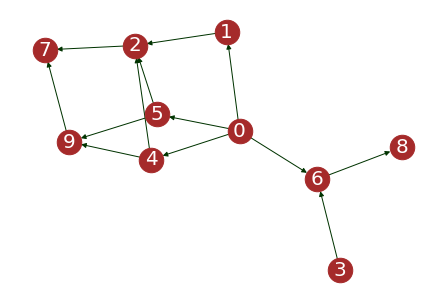

In [7]:
class Machine:
    
    def __init__(self,id,mips):
        self.id=id
        self.free_time=0
        self.mips=mips
        self.t_ava=0

class Job:

    def __init__(self, id, dependency , dependent ,size):
        self.id=id
        self.dependency=dependency
        self.dependent=dependent
        self.size=size
        self.is_done=0
        self.tdep=-1
        self.stop=float("inf")
        self.start=0
        self.ass_mach_id=-1
        
        
def plausible():
    plausible=[]
    for i in range(G.number_of_nodes()):
        if nodes[i].is_done == 0 and nodes[i].tdep != -1:
            plausible.append(nodes[i])
    return plausible
        
def all_done():
    for i in range(G.number_of_nodes()):
        if nodes[i].is_done == 0:
            return False
    return True
            
def update_tdep():
    for i in range(G.number_of_nodes()):
        maxim=float("-inf")
        for j in range(len(nodes[i].dependency)):
            tmp=nodes[i].dependency[j]
            if nodes[tmp].stop > maxim: 
                    maxim=nodes[tmp].stop
        if maxim != float("-inf") and maxim!= float("inf"):                    
            nodes[i].tdep= maxim
    
job_list=pd.read_csv("dependency.txt" , sep="," , header=None)



m_power=[1000,1200,1500]
j_volume=[2000,4800,4500,8000,19500,9600,4000,3600,6000,3600]

machines=[]
for i in range(len(m_power)):
      machines.append(Machine(i, m_power[i]))


        
G=nx.DiGraph()
               
length= len(job_list[job_list[0][:]])  
            
for i in range(length):
    for j in range(length):
               if job_list[i][j] == 1:
                G.add_edge(i,j)
                
nx.draw(G ,with_labels = True, pos = nx.drawing.nx_agraph.graphviz_layout(G), node_color='brown',
        node_size=600, edge_color='#003300', linewidths=1, font_size=20 ,font_color="white")

out_degree=[]
in_edge=[]
tmp=[]
for i in range(length):
    out_degree.append(G.out_degree(i))
    a=G.in_edges(i)
    a=zip(*a)
    tmp.append(list(a))

    if tmp[i]:
        in_edge.append(list(tmp[i][0]))
    else:
        in_edge.append([])

nodes=[]
for i in range(G.number_of_nodes()):
    nodes.append(Job(i,in_edge[i],out_degree[i],j_volume[i]))
    
    if len(nodes[i].dependency) == 0:
        nodes[i].tdep = 0


while(not all_done()):
            
    pls=plausible()
    
    pos = sorted(pls, key=lambda x: (-x.dependent , -x.size ))
    
    
    for t in range(len(machines)):
        machines[t].t_ava= max(machines[t].free_time , pos[0].tdep)
            
    m_list= sorted(machines, key = lambda x : (x.t_ava ,-x.mips)) 


        
    i=0
    job=pos[i]
    j=0

    m_list[j].free_time=m_list[j].t_ava+(pos[i].size/m_list[j].mips)

    machines=m_list

    for k in range (G.number_of_nodes()):
        if(nodes[k].id==pos[i].id):
            nodes[k].start=m_list[j].t_ava
            nodes[k].is_done=1
            nodes[k].stop=m_list[j].free_time
            nodes[k].ass_mach_id= m_list[j].id
            
    update_tdep()   

maximum_time=float("-inf")
for i in range(len(m_list)):
    if m_list[i].free_time > maximum_time:
        maximum_time = m_list[i].free_time
        max_id=m_list[i].id
            
    
init_notebook_mode(connected=True)

    
df=[]
for i in range(G.number_of_nodes()):
    time.sleep(1.5)    
    clear_output()
    df.append(dict(Task="Machine  "+str(nodes[i].ass_mach_id), Start=str(nodes[i].start), Finish=str(nodes[i].stop), Resource=str(nodes[i].id)))
    fig = go.FigureWidget(ff.create_gantt(df, title="Scheduled Tasks Graph" , index_col='Resource' , show_colorbar=True, group_tasks=True ) )
    fig.layout.xaxis.type = 'linear'
    plotly.offline.iplot(fig)   


print ("\n\nMaximum Engagment Time is", maximum_time , "On Machine:" , max_id ,"\n\n\n" )
